In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

from definitions import PROCESSED_DATA_DIR
from src.data.indicators import rsi, stochRSI, ema
from src.models.strategies import RSIStoch200EMA, BuyAndHold

In [2]:
btcusdt = pd.read_csv(PROCESSED_DATA_DIR / 'BTCUSDT.csv')
btcusdt.index = pd.DatetimeIndex(btcusdt['open time'])

btcusdt

,open time,open,high,low,close,volume,ema,rsi,stoch_k,stoch_d
open time,,,,,,,,,,
2017-08-17 20:30:00,2017-08-17 20:30:00,4301.91,4354.84,4262.53,4346.74,15.184266,4346.740000,NaN,NaN,NaN
2017-08-17 21:00:00,2017-08-17 21:00:00,4346.74,4369.69,4315.85,4349.33,29.292665,4346.765771,100.000000,NaN,NaN
2017-08-17 21:30:00,2017-08-17 21:30:00,4349.33,4369.69,4309.23,4333.55,32.480371,4346.634271,13.225186,NaN,NaN
2017-08-17 22:00:00,2017-08-17 22:00:00,4333.55,4349.63,4310.00,4326.29,26.241174,4346.431840,9.248769,NaN,NaN
2017-08-17 22:30:00,2017-08-17 22:30:00,4326.29,4359.13,4319.11,4336.80,31.134968,4346.336001,38.211911,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-05-31 21:30:00,2021-05-31 21:30:00,36775.02,37087.30,36623.01,36932.55,840.717074,36229.710395,58.482794,0.198487,0.133164
2021-05-31 22:00:00,2021-05-31 22:00:00,36932.55,37250.00,36863.28,37090.16,1407.839699,36238.272082,61.498708,0.419132,0.235186
2021-05-31 22:30:00,2021-05-31 22:30:00,37090.16,37140.00,36835.85,36879.23,908.355699,36244.649773,55.670255,0.430699,0.349439


In [3]:
strategy = RSIStoch200EMA(
    max_number_open_trades=3,
    min_period_to_last_low=5,
    max_period_to_last_low=50,
    min_absolute_slope_rsi=0.2,
    swing_low_margin=2
)

results = strategy.apply(
    ohlcv_timeseries=btcusdt.iloc[:17500],
    asset_name='BTCUSDT'
)

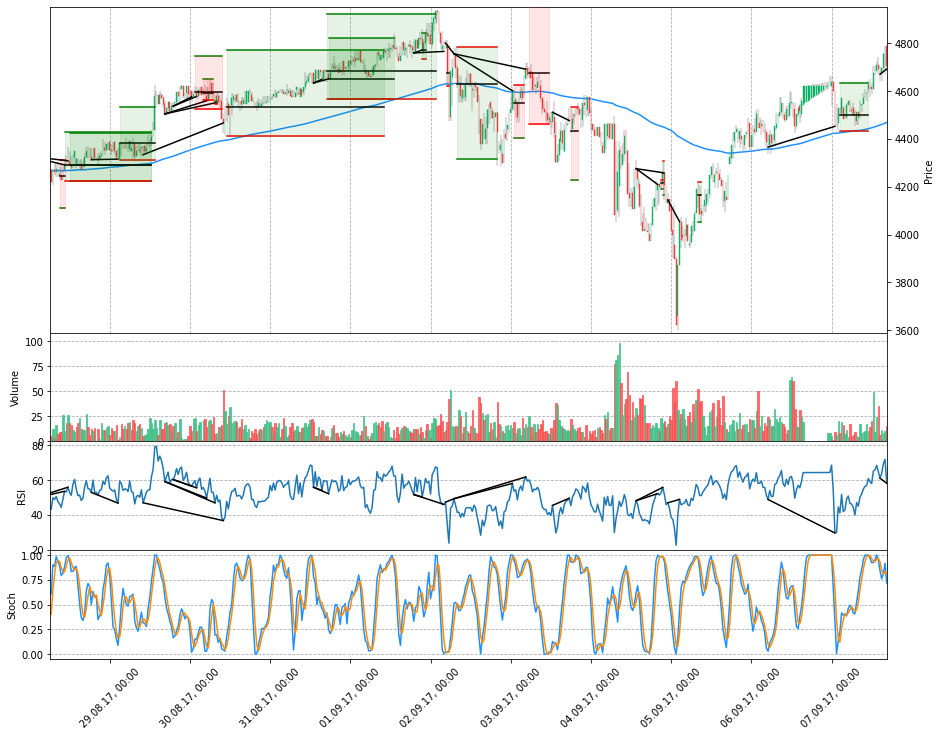

In [4]:
start_time = btcusdt.iloc[500].name
end_time = btcusdt.iloc[1000].name
results.plot(start_time, end_time)

In [5]:
buyandhold_strategy = BuyAndHold()
results = buyandhold_strategy.apply(
    ohlcv_timeseries=btcusdt,
    asset_name='BTCUSDT'
)
results.evaluation()
results.pnl

7.570517215200358

In [6]:
btcusdt.loc[pd.Timestamp('2021-05-01 00:00:00'):]

,open time,open,high,low,close,volume,ema,rsi,stoch_k,stoch_d
open time,,,,,,,,,,
2021-05-01 00:00:00,2021-05-01 00:00:00,57697.25,58088.00,57421.05,58043.34,2217.513426,54391.689362,77.267874,0.929340,0.687520
2021-05-01 00:30:00,2021-05-01 00:30:00,58043.33,58065.00,57647.00,57811.42,1262.936090,54425.716533,71.491751,0.838097,0.815617
2021-05-01 01:00:00,2021-05-01 01:00:00,57809.99,57926.75,57470.77,57816.33,1286.215723,54459.453980,71.540257,0.677553,0.814997
2021-05-01 01:30:00,2021-05-01 01:30:00,57816.34,58456.52,57727.36,58450.00,1702.164911,54499.160906,76.983234,0.669575,0.728408
2021-05-01 02:00:00,2021-05-01 02:00:00,58450.00,58458.07,58132.03,58319.99,1178.479534,54537.179106,73.862010,0.736013,0.694380
...,...,...,...,...,...,...,...,...,...,...
2021-05-31 21:30:00,2021-05-31 21:30:00,36775.02,37087.30,36623.01,36932.55,840.717074,36229.710395,58.482794,0.198487,0.133164
2021-05-31 22:00:00,2021-05-31 22:00:00,36932.55,37250.00,36863.28,37090.16,1407.839699,36238.272082,61.498708,0.419132,0.235186
2021-05-31 22:30:00,2021-05-31 22:30:00,37090.16,37140.00,36835.85,36879.23,908.355699,36244.649773,55.670255,0.430699,0.349439


In [7]:
strategy = RSIStoch200EMA(
    max_number_open_trades=3,
    min_period_to_last_low=5,
    max_period_to_last_low=50,
    min_absolute_slope_rsi=0.2,
    swing_low_margin=2
)

fin_data = btcusdt.loc[pd.Timestamp('2021-01-01 00:00:00'):]
results = strategy.apply(
    ohlcv_timeseries=fin_data,
    asset_name='BTCUSDT'
)

#start_time = btcusdt.iloc[200].name
#end_time = btcusdt.iloc[400].name
#results.plot(btcusdt.iloc[0].name, btcusdt.iloc[500].name)

### First try

In [8]:
import numpy as np

max_number_open_trades=3

budget = 1.0
num_positions = 0

# Convert trades to chronology of buy/sell events
events = []
for t in results.trades:
    # Calculate profit and loss of individual trade
    if t['long']:
        if t['win']:
            pnl = t['take_profit'] / t['entry_price'] - 1.0
        else:
            pnl = t['stop_loss'] / t['entry_price'] - 1.0
    else:
        if t['win']:
            pnl = - (t['take_profit'] / t['entry_price'] - 1.0)
        else:
            pnl = - (t['stop_loss'] / t['entry_price'] - 1.0)
    events.append({
        'timestamp': t['entry_time'],
        'event': 'entry',
        'entry_time': t['entry_time'],
        'exit_time': t['exit_time'],
        'pnl': pnl,
        'investment': np.NaN
    })
    events.append({
        'timestamp': t['exit_time'],
        'event': 'exit',
        'entry_time': t['entry_time'],
        'pnl': pnl
    })
    events_df = pd.DataFrame(events)
    events_df = events_df.sort_values(by=['timestamp', 'event'], ascending=[True, False]).reset_index()

In [9]:
for idx, row in events_df.iterrows():
    
    s = ''
    if row['event'] == 'entry':
        investment = budget / (max_number_open_trades - num_positions)
        events_df.loc[idx, 'investment'] = investment
        budget -= investment

        s = f'investment: {investment:.4f}'

        num_positions += 1
    elif row['event'] == 'exit':
        budget += events_df[(events_df['entry_time'] == row['entry_time']) & (events_df['event'] == 'entry')]['investment'].iloc[0] * \
            (1.0 + row['pnl'])
        num_positions -= 1
        
        s = f"outcome: {events_df[(events_df['entry_time'] == row['entry_time']) & (events_df['event'] == 'entry')]['investment'].iloc[0] * (1.0 + row['pnl']):.4f}"
    print(f"ts: {row['timestamp']} {row['event']}, num_pos: {num_positions}, {s}, budget: {budget}")

ts: 2021-01-01 19:00:00 entry, num_pos: 1, investment: 0.3333, budget: 0.6666666666666667
ts: 2021-01-02 12:00:00 exit, num_pos: 0, outcome: 0.3439, budget: 1.0105348088297583
ts: 2021-01-02 22:00:00 entry, num_pos: 1, investment: 0.3368, budget: 0.6736898725531721
ts: 2021-01-03 11:30:00 entry, num_pos: 2, investment: 0.3368, budget: 0.33684493627658607
ts: 2021-01-03 15:00:00 exit, num_pos: 1, outcome: 0.3266, budget: 0.6634716954332421
ts: 2021-01-03 15:30:00 entry, num_pos: 2, investment: 0.3317, budget: 0.33173584771662107
ts: 2021-01-03 16:30:00 exit, num_pos: 1, outcome: 0.3237, budget: 0.6554289677368927
ts: 2021-01-03 17:00:00 entry, num_pos: 2, investment: 0.3277, budget: 0.32771448386844637
ts: 2021-01-03 18:30:00 exit, num_pos: 1, outcome: 0.3212, budget: 0.6489120012270266
ts: 2021-01-04 09:30:00 exit, num_pos: 0, outcome: 0.3167, budget: 0.9655690404413552
ts: 2021-01-04 15:30:00 entry, num_pos: 1, investment: 0.3219, budget: 0.6437126936275701
ts: 2021-01-04 16:00:00 exi

ts: 2021-01-25 19:30:00 exit, num_pos: 0, outcome: 0.3077, budget: 0.9271045562108512
ts: 2021-01-25 20:30:00 entry, num_pos: 1, investment: 0.3090, budget: 0.6180697041405674
ts: 2021-01-25 21:00:00 exit, num_pos: 0, outcome: 0.3050, budget: 0.9230222078647585
ts: 2021-01-25 22:00:00 entry, num_pos: 1, investment: 0.3077, budget: 0.6153481385765056
ts: 2021-01-26 03:00:00 entry, num_pos: 2, investment: 0.3077, budget: 0.3076740692882528
ts: 2021-01-26 11:00:00 entry, num_pos: 3, investment: 0.3077, budget: 0.0
ts: 2021-01-26 14:30:00 exit, num_pos: 2, outcome: 0.3176, budget: 0.31756394182277037
ts: 2021-01-26 18:30:00 entry, num_pos: 3, investment: 0.3176, budget: 0.0
ts: 2021-01-26 19:00:00 exit, num_pos: 2, outcome: 0.3160, budget: 0.3160083717373781
ts: 2021-01-26 23:00:00 exit, num_pos: 1, outcome: 0.2981, budget: 0.6140713605019344
ts: 2021-01-26 23:30:00 entry, num_pos: 2, investment: 0.3070, budget: 0.3070356802509672
ts: 2021-01-27 05:00:00 exit, num_pos: 1, outcome: 0.3162, 

ts: 2021-02-20 08:00:00 exit, num_pos: 2, outcome: 0.3420, budget: 0.34197747567809683
ts: 2021-02-20 09:00:00 exit, num_pos: 1, outcome: 0.3383, budget: 0.6802918825309014
ts: 2021-02-20 16:30:00 entry, num_pos: 2, investment: 0.3401, budget: 0.3401459412654507
ts: 2021-02-20 22:30:00 exit, num_pos: 1, outcome: 0.3338, budget: 0.6739725014460238
ts: 2021-02-20 23:00:00 entry, num_pos: 2, investment: 0.3370, budget: 0.3369862507230119
ts: 2021-02-21 22:30:00 entry, num_pos: 3, investment: 0.3370, budget: 0.0
ts: 2021-02-22 00:00:00 exit, num_pos: 2, outcome: 0.3343, budget: 0.33433887163232684
ts: 2021-02-22 01:30:00 entry, num_pos: 3, investment: 0.3343, budget: 0.0
ts: 2021-02-22 02:00:00 exit, num_pos: 2, outcome: 0.3290, budget: 0.3290296544658435
ts: 2021-02-22 10:00:00 exit, num_pos: 1, outcome: 0.3261, budget: 0.6551142111357894
ts: 2021-02-22 13:30:00 exit, num_pos: 0, outcome: 0.3197, budget: 0.9747905185255936
ts: 2021-02-22 14:30:00 entry, num_pos: 1, investment: 0.3249, bud

ts: 2021-03-20 20:00:00 exit, num_pos: 1, outcome: 0.3101, budget: 0.6216853504870195
ts: 2021-03-21 09:30:00 exit, num_pos: 0, outcome: 0.3015, budget: 0.9231723315825826
ts: 2021-03-21 15:30:00 entry, num_pos: 1, investment: 0.3077, budget: 0.6154482210550551
ts: 2021-03-21 19:00:00 exit, num_pos: 0, outcome: 0.3054, budget: 0.9208169912789023
ts: 2021-03-21 20:30:00 entry, num_pos: 1, investment: 0.3069, budget: 0.6138779941859349
ts: 2021-03-21 21:30:00 exit, num_pos: 0, outcome: 0.3054, budget: 0.9192519289281942
ts: 2021-03-22 01:30:00 entry, num_pos: 1, investment: 0.3064, budget: 0.6128346192854628
ts: 2021-03-22 10:00:00 exit, num_pos: 0, outcome: 0.2980, budget: 0.9108753185465802
ts: 2021-03-22 17:30:00 entry, num_pos: 1, investment: 0.3036, budget: 0.6072502123643868
ts: 2021-03-22 18:30:00 exit, num_pos: 0, outcome: 0.3054, budget: 0.912650675327918
ts: 2021-03-23 02:30:00 entry, num_pos: 1, investment: 0.3042, budget: 0.6084337835519453
ts: 2021-03-23 10:30:00 entry, num_

ts: 2021-04-11 13:30:00 exit, num_pos: 0, outcome: 0.2948, budget: 0.8885260413487845
ts: 2021-04-12 11:30:00 entry, num_pos: 1, investment: 0.2962, budget: 0.592350694232523
ts: 2021-04-13 08:00:00 exit, num_pos: 0, outcome: 0.3055, budget: 0.8978698910236483
ts: 2021-04-13 13:00:00 entry, num_pos: 1, investment: 0.2993, budget: 0.5985799273490988
ts: 2021-04-13 13:30:00 exit, num_pos: 0, outcome: 0.3001, budget: 0.89872844556022
ts: 2021-04-13 18:30:00 entry, num_pos: 1, investment: 0.2996, budget: 0.5991522970401466
ts: 2021-04-13 19:30:00 exit, num_pos: 0, outcome: 0.3011, budget: 0.900204476369682
ts: 2021-04-14 03:30:00 entry, num_pos: 1, investment: 0.3001, budget: 0.600136317579788
ts: 2021-04-14 10:30:00 entry, num_pos: 2, investment: 0.3001, budget: 0.300068158789894
ts: 2021-04-14 14:00:00 exit, num_pos: 1, outcome: 0.2965, budget: 0.5966110799667486
ts: 2021-04-14 14:00:00 exit, num_pos: 0, outcome: 0.2947, budget: 0.8912950375156228
ts: 2021-04-14 15:30:00 entry, num_pos: 

ts: 2021-05-03 12:00:00 entry, num_pos: 2, investment: 0.3137, budget: 0.31366816610928405
ts: 2021-05-03 13:30:00 exit, num_pos: 1, outcome: 0.3108, budget: 0.6244707733071531
ts: 2021-05-03 13:30:00 exit, num_pos: 0, outcome: 0.3125, budget: 0.9369790960816387
ts: 2021-05-03 19:00:00 entry, num_pos: 1, investment: 0.3123, budget: 0.6246527307210925
ts: 2021-05-03 19:30:00 exit, num_pos: 0, outcome: 0.3113, budget: 0.9359072328154358
ts: 2021-05-04 07:30:00 entry, num_pos: 1, investment: 0.3120, budget: 0.6239381552102905
ts: 2021-05-04 09:00:00 entry, num_pos: 2, investment: 0.3120, budget: 0.31196907760514525
ts: 2021-05-04 10:00:00 exit, num_pos: 1, outcome: 0.3092, budget: 0.6211474491082523
ts: 2021-05-04 10:00:00 exit, num_pos: 0, outcome: 0.3110, budget: 0.932109847399694
ts: 2021-05-05 02:30:00 entry, num_pos: 1, investment: 0.3107, budget: 0.6214065649331293
ts: 2021-05-05 06:00:00 exit, num_pos: 0, outcome: 0.3155, budget: 0.9368623845333951
ts: 2021-05-05 22:00:00 entry, nu

ts: 2021-05-23 22:00:00 exit, num_pos: 1, outcome: 0.3866, budget: 0.7789539369937125
ts: 2021-05-24 00:00:00 entry, num_pos: 2, investment: 0.3895, budget: 0.38947696849685626
ts: 2021-05-24 00:30:00 exit, num_pos: 1, outcome: 0.3923, budget: 0.7818076397666146
ts: 2021-05-24 03:00:00 exit, num_pos: 0, outcome: 0.3511, budget: 1.1328621343145784
ts: 2021-05-24 06:00:00 entry, num_pos: 1, investment: 0.3776, budget: 0.7552414228763855
ts: 2021-05-24 06:30:00 exit, num_pos: 0, outcome: 0.3765, budget: 1.1317459285922447
ts: 2021-05-24 17:30:00 entry, num_pos: 1, investment: 0.3772, budget: 0.7544972857281631
ts: 2021-05-24 19:30:00 exit, num_pos: 0, outcome: 0.3950, budget: 1.1495326757796305
ts: 2021-05-24 23:30:00 entry, num_pos: 1, investment: 0.3832, budget: 0.7663551171864202
ts: 2021-05-25 03:00:00 exit, num_pos: 0, outcome: 0.3745, budget: 1.1408528205959194
ts: 2021-05-25 03:00:00 entry, num_pos: 1, investment: 0.3803, budget: 0.7605685470639463
ts: 2021-05-25 04:00:00 exit, num

### Second try: records real-time total value

In [10]:
max_number_open_trades = 3

trade_idx = 0
open_trades = []
budget = 1.0
total_value = 1.0
total_value_series = []

for idx, row in fin_data.iterrows():
    
    # st = f'{idx} ' ###################
    
    # Update open positions
    for ot in open_trades:
        # Close due positions
        if ot['exit_time'] == idx:
            if ot['long']:
                if ot['win']:
                    gain = ot['take_profit'] / ot['entry_price']
                else:
                    gain = ot['stop_loss'] / ot['entry_price']
            else:
                if ot['win']:
                    gain = -ot['take_profit'] / ot['entry_price'] + 2
                else:
                    gain = -ot['stop_loss'] / ot['entry_price'] + 2
            # st += f"close trade from {ot['entry_time']}. gain: {gain:.4f} " ##############
            budget += gain * ot['investment']
    open_trades = [ot for ot in open_trades if ot['exit_time'] > idx]
    
    # Scan for trade entries
    if trade_idx < len(results.trades) and results.trades[trade_idx]['entry_time'] == idx:
        new_trade = results.trades[trade_idx].copy()
        new_trade['investment'] = budget / (max_number_open_trades - len(open_trades))
        budget -= new_trade['investment']
        open_trades.append(new_trade)
        trade_idx += 1
        
        # st += f"open trade, invest {new_trade['investment']:.4f} " ###############
        
    # Update current value of all positions and budget
    total_value = budget
    for ot in open_trades:
        if ot['long']:
            val = row['close'] / ot['entry_price'] * ot['investment']
        else:
            val = (-row['close'] / ot['entry_price'] + 2) * ot['investment']
        total_value += val
    total_value_series.append(total_value)
    
    # st += f'budget: {budget:.4f}, total_value: {total_value:.4f}' ################
    # print(st) ###############
    
pnl_history = pd.Series(data=total_value_series, index=fin_data.index) - 1.0
pnl_history

open time
2021-01-01 00:00:00    0.000000
2021-01-01 00:30:00    0.000000
2021-01-01 01:00:00    0.000000
2021-01-01 01:30:00    0.000000
2021-01-01 02:00:00    0.000000
                         ...   
2021-05-31 21:30:00    0.063513
2021-05-31 22:00:00    0.066540
2021-05-31 22:30:00    0.062489
2021-05-31 23:00:00    0.070600
2021-05-31 23:30:00    0.061715
Length: 7248, dtype: float64

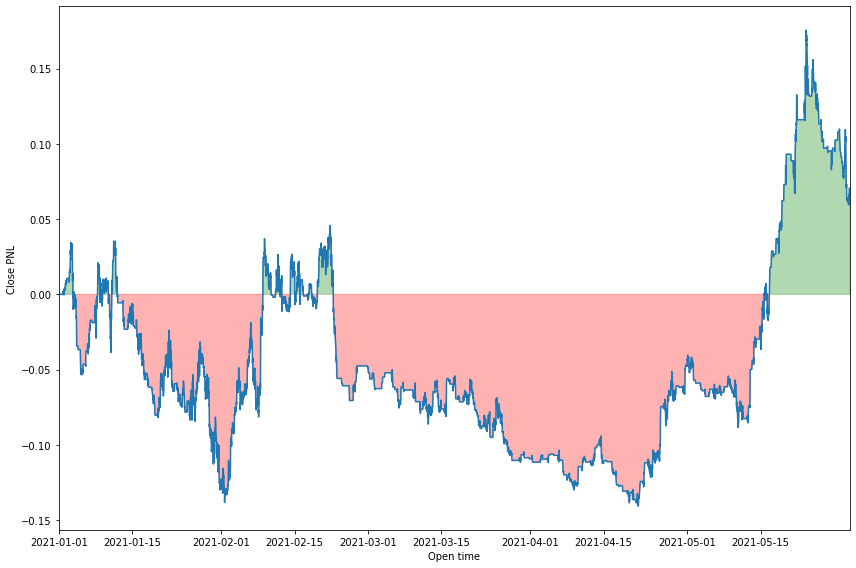

In [11]:
import matplotlib.pyplot as plt
import numpy as np

figsize = (12, 8)
ylim = (-0.2, 0.2)


fig, ax = plt.subplots(figsize=figsize)
ax.margins(x=0)
ax.plot(pnl_history)
plt.ylim(None)
plt.xlabel("Open time")
plt.ylabel("Close PNL")
plt.tight_layout()

plt.fill_between(x=pnl_history.index, y1=pnl_history, y2=0,
                 where=(pnl_history < 0),
                 alpha=0.30, color='red', interpolate=True)
plt.fill_between(x=pnl_history.index, y1=pnl_history, y2=0,
                 where=(pnl_history >= 0),
                 alpha=0.30, color='green', interpolate=True)

plt.show()

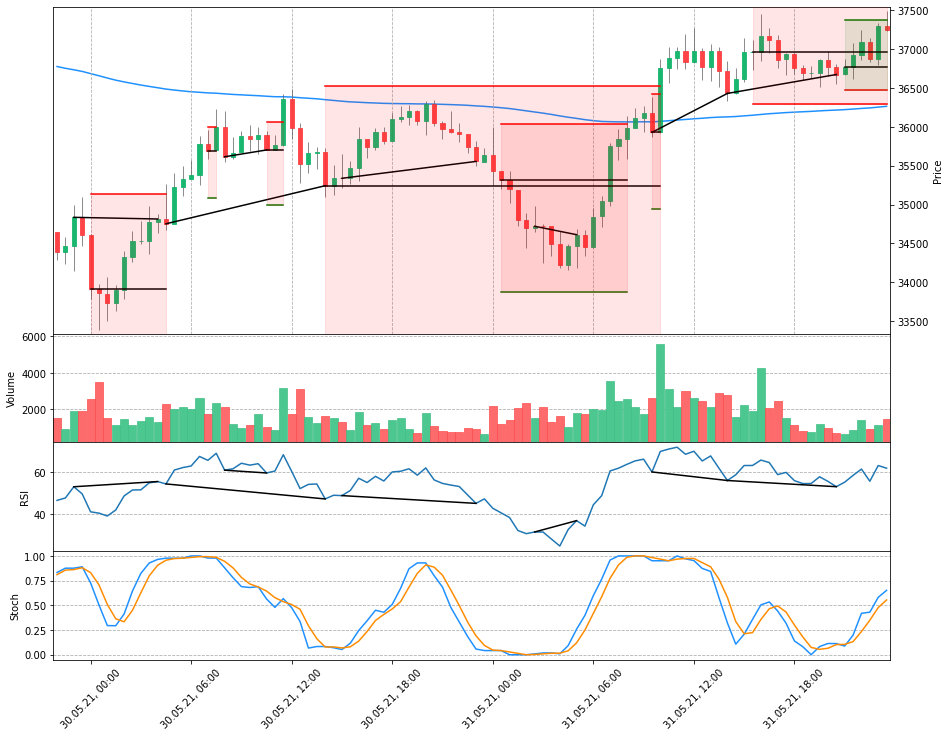

In [12]:
results.plot(fin_data.iloc[-100].name, fin_data.iloc[-1].name)

### Debug after implementation

In [13]:
strategy = RSIStoch200EMA(
    max_number_open_trades=3,
    min_period_to_last_low=5,
    max_period_to_last_low=50,
    min_absolute_slope_rsi=0.2,
    swing_low_margin=2,
    take_profit_factor=1
)

fin_data = btcusdt#.loc[pd.Timestamp('2021-01-01 00:00:00'):]
results = strategy.apply(
    ohlcv_timeseries=fin_data,
    asset_name='BTCUSDT'
)

In [14]:
results.evaluation()

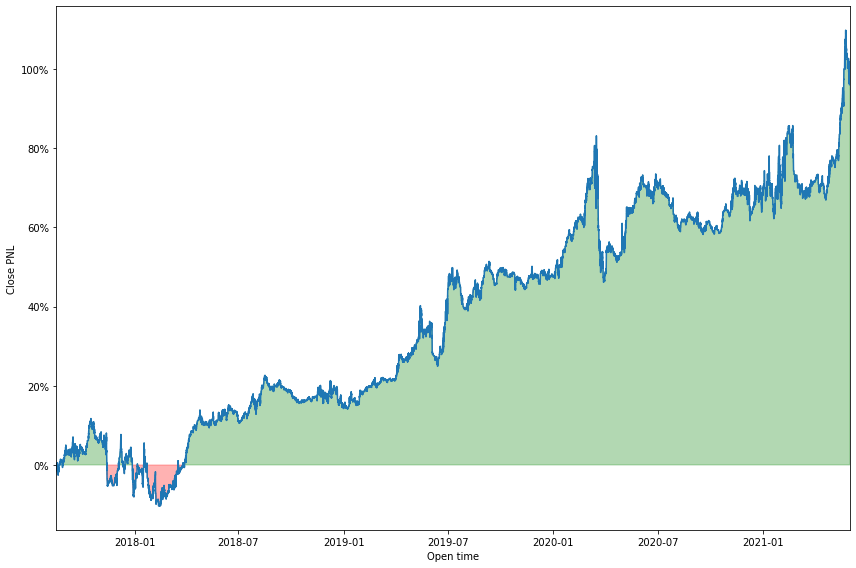

In [15]:
results.plot_pnl_history()

In [16]:
results.pnl

0.9598859705578917

RSI Stoch EMA200 strategy. Final PNL: -0.017767810112756743


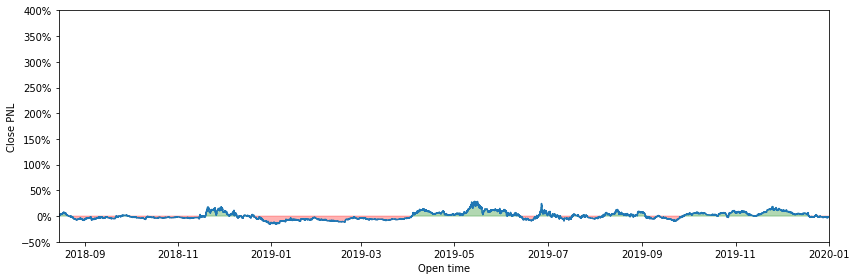

In [17]:
strategy = RSIStoch200EMA(
    max_number_open_trades=1,
    min_period_to_last_low=2,
    max_period_to_last_low=100,
    min_absolute_slope_rsi=0.16,
    swing_low_margin=2,
    swing_low_factor=0.999,
    take_profit_factor=1.50
)

ylim = (-0.5, 4.0)
figsize = (12, 4)
# Bear market 2018: pd.Timestamp('2017-12-15 00:00:00'):pd.Timestamp('2018-07-01 00:00:00')
fin_data = btcusdt.loc[pd.Timestamp('2018-08-15 00:00:00'):pd.Timestamp('2020-01-01 01:00:00')]
results_1 = strategy.apply(
    ohlcv_timeseries=fin_data,
    asset_name='BTCUSDT'
)
results_1.evaluation()
print(f"RSI Stoch EMA200 strategy. Final PNL: {results_1.pnl}")
results_1.plot_pnl_history(ylim=ylim, figsize=figsize)

In [18]:
for t in results_1.trades:
    print(t['exit_time'])

2018-08-15 08:30:00
2018-08-15 09:30:00
2018-08-15 16:00:00
2018-08-15 23:00:00
2018-08-16 10:30:00
2018-08-17 06:00:00
2018-08-18 00:30:00
2018-08-18 13:00:00
2018-08-19 21:00:00
2018-08-20 09:00:00
2018-08-20 16:30:00
2018-08-21 08:00:00
2018-08-21 16:30:00
2018-08-22 00:30:00
2018-08-22 15:30:00
2018-08-24 21:30:00
2018-08-25 06:30:00
2018-08-25 08:30:00
2018-08-26 02:00:00
2018-08-26 05:30:00
2018-08-26 06:00:00
2018-08-27 12:30:00
2018-08-27 20:30:00
2018-08-27 23:30:00
2018-08-28 11:00:00
2018-08-30 09:30:00
2018-08-30 20:00:00
2018-09-01 15:00:00
2018-09-05 10:30:00
2018-09-05 13:30:00
2018-09-05 23:30:00
2018-09-06 09:30:00
2018-09-06 14:00:00
2018-09-06 19:30:00
2018-09-07 10:00:00
2018-09-08 17:30:00
2018-09-09 09:00:00
2018-09-09 22:00:00
2018-09-13 00:00:00
2018-09-13 08:30:00
2018-09-13 13:30:00
2018-09-13 19:30:00
2018-09-14 02:30:00
2018-09-14 08:00:00
2018-09-14 16:00:00
2018-09-16 04:00:00
2018-09-16 17:30:00
2018-09-17 09:00:00
2018-09-18 12:00:00
2018-09-18 19:30:00


Buy and hold strategy. Final PNL: 0.16421085936037083


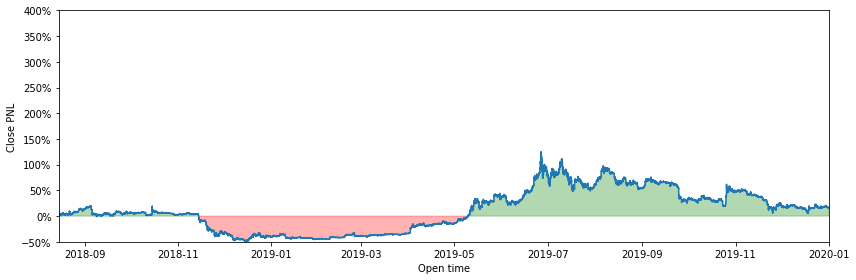

In [19]:
buyandhold_strategy = BuyAndHold()
#fin_data = btcusdt#.loc[pd.Timestamp('2021-01-01 00:00:00'):]
results_2 = buyandhold_strategy.apply(
    ohlcv_timeseries=fin_data,
    asset_name='BTCUSDT'
)
results_2.evaluation()
print(f"Buy and hold strategy. Final PNL: {results_2.pnl}")
results_2.plot_pnl_history(ylim=ylim, figsize=figsize)

RSI Stoch EMA200 strategy. Final PNL: 7.6178380939960775


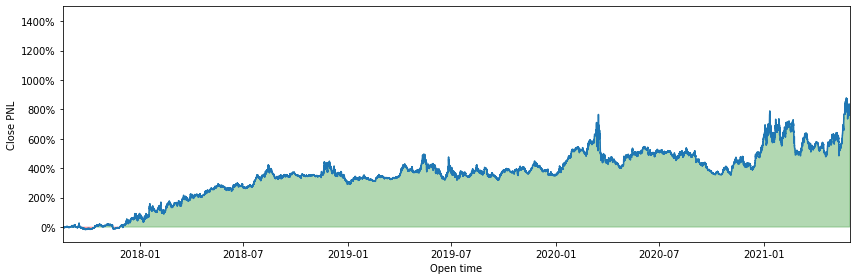

Buy and hold strategy. Final PNL: 7.570517215200358


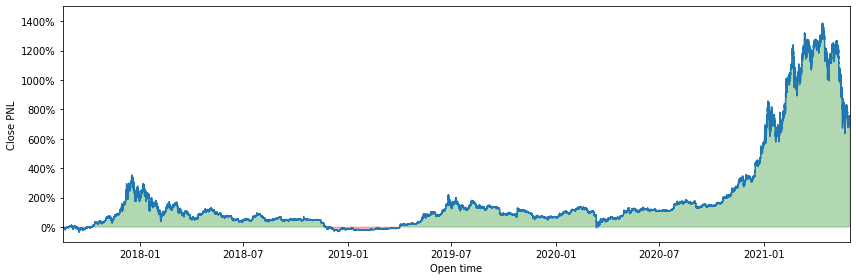

In [95]:
ylim = (-1.0, 15.0)
print(f"RSI Stoch EMA200 strategy. Final PNL: {results_1.pnl}")
results_1.plot_pnl_history(ylim=ylim, figsize=figsize)
print(f"Buy and hold strategy. Final PNL: {results_2.pnl}")
results_2.plot_pnl_history(ylim=ylim, figsize=figsize)

### Test on pairs other than BTCUSDT

In [117]:
from pathlib import Path

pairs = ['LTCUSDT', 'ETHUSDT', 'SANDUSDT', 'DOGEUSDT']
path = Path('D:/binance_ohlcv/30min')
pairs_df = {}

for p in pairs:
    pairs_df[p] = pd.read_csv(path / f'{p}.csv')
    pairs_df[p].index = pd.DatetimeIndex(pairs_df[p]['open time'])

In [118]:
strategy_rsi = RSIStoch200EMA(
    max_number_open_trades=1,
    min_period_to_last_low=2,
    max_period_to_last_low=100,
    min_absolute_slope_rsi=0.16,
    swing_low_margin=2,
    swing_low_factor=0.999,
    take_profit_factor=1.50
)
strategy_buyandhold = BuyAndHold()

In [119]:
results_rsi = {}
results_bnh = {}

for p in pairs:
    results_rsi[p] = strategy_rsi.apply(
        ohlcv_timeseries=pairs_df[p],
        asset_name=p
    )
    results_rsi[p].evaluation()
    results_bnh[p] = strategy_buyandhold.apply(
        ohlcv_timeseries=pairs_df[p],
        asset_name=p
    )
    results_bnh[p].evaluation()

LTCUSDT RSI Stoch EMA200 strategy. Final PNL: -0.6564047490146369


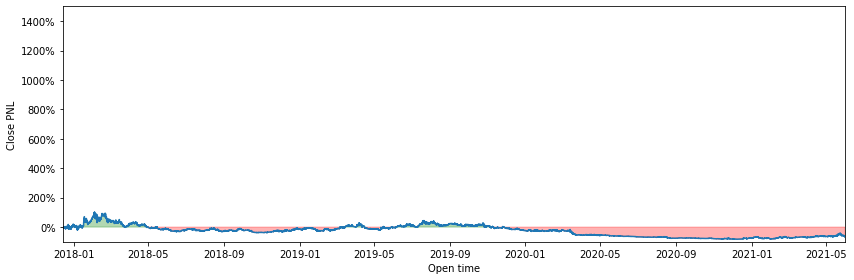

LTCUSDT Buy and hold strategy. Final PNL: -0.33348698673852917


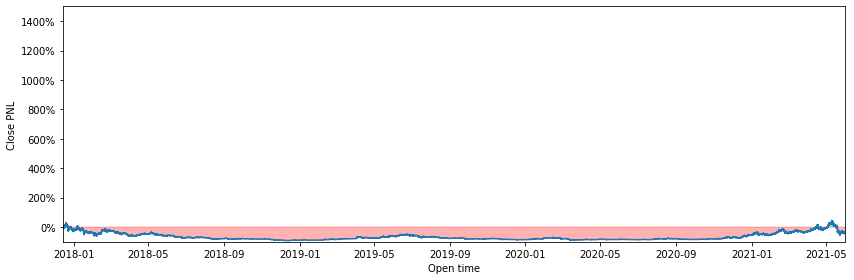

ETHUSDT RSI Stoch EMA200 strategy. Final PNL: 20.71098722606775


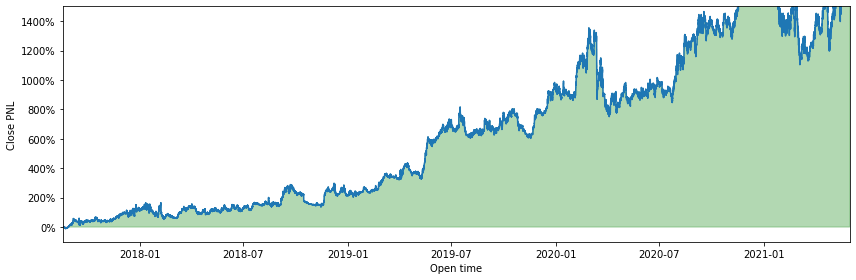

ETHUSDT Buy and hold strategy. Final PNL: 7.878736179008497


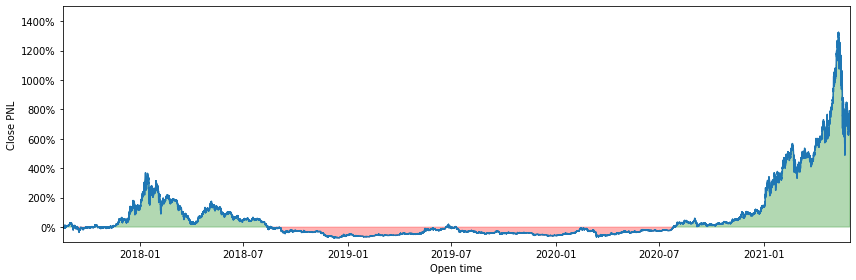

SANDUSDT RSI Stoch EMA200 strategy. Final PNL: -0.822222399507458


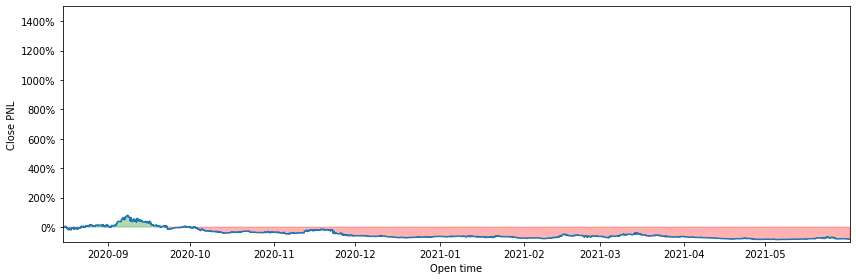

SANDUSDT Buy and hold strategy. Final PNL: 4.587458193979933


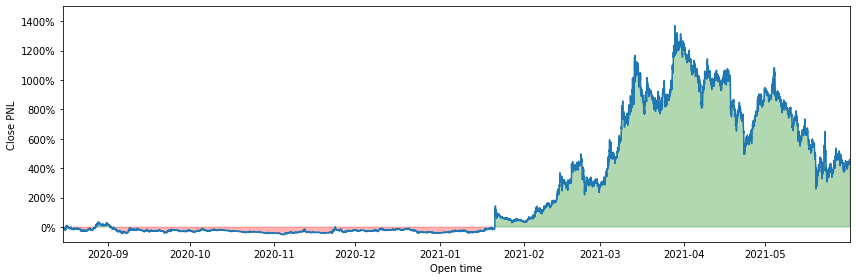

DOGEUSDT RSI Stoch EMA200 strategy. Final PNL: 1.7760781292002905


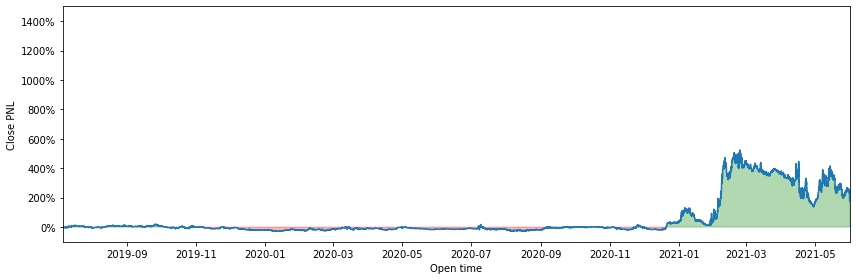

DOGEUSDT Buy and hold strategy. Final PNL: 85.93690085182516


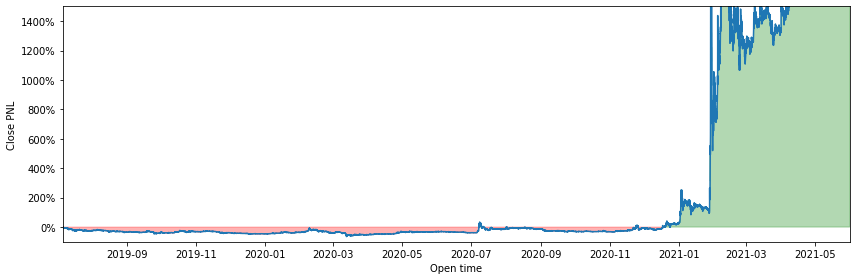

In [120]:
for p in pairs:
    ylim = (-1.0, 15.0)
    print(f"{p} RSI Stoch EMA200 strategy. Final PNL: {results_rsi[p].pnl}")
    results_rsi[p].plot_pnl_history(ylim=ylim, figsize=figsize)
    print(f"{p} Buy and hold strategy. Final PNL: {results_bnh[p].pnl}")
    results_bnh[p].plot_pnl_history(ylim=ylim, figsize=figsize)

c:\users\richard\desktop\codingprojects\cryptotradingbot\ctb\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


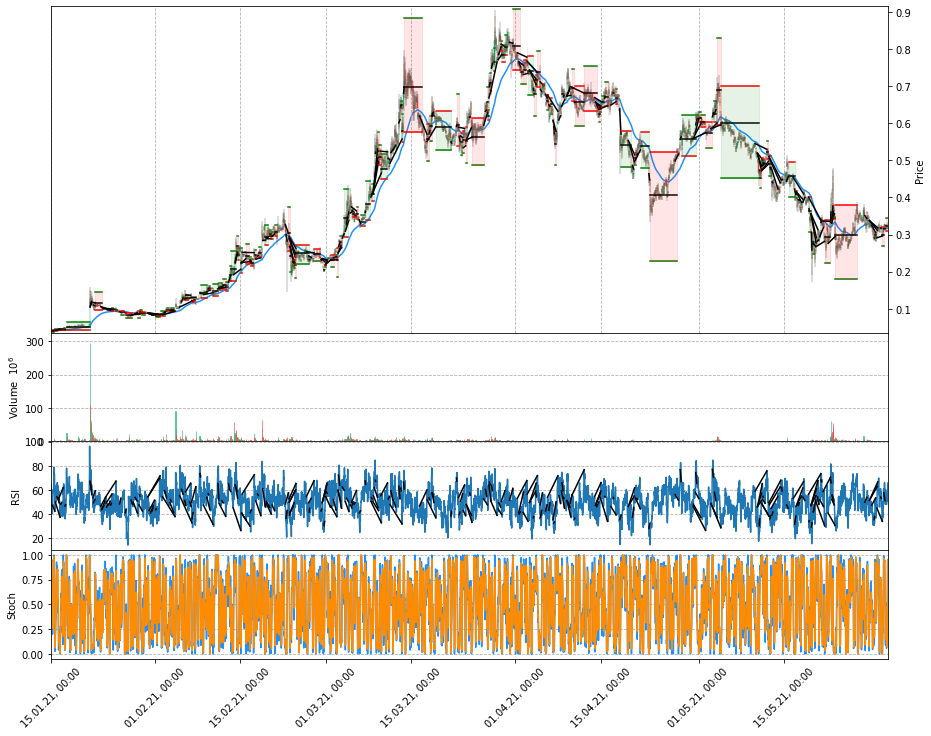

In [121]:
results_rsi['SANDUSDT'].plot(pd.Timestamp('2021-01-15 00:00:00'))